In [1]:
from scripts.scripts import *

In [34]:
df = open_csv_as_dataframe(file_name="test_grid03",sep=",",index_col=0)
grid_coor = grid_to_coordinate(grid_df=df, target_column="bm_dens")
save_dataframe_to_csv(df=df, file_name="test_grid03_coor")

Opened csv from csv_files/test_grid03.csv. Shape: (43, 4)


In [2]:
bm_dens_col_name = "bm_dens"
bm_dens_bins = (
    Bin(bm_dens_col_name, 1,"First bin", 0, 20, simplekml.Color.orange),
    Bin(bm_dens_col_name, 2,"Second bin", 20, 40, simplekml.Color.tomato),
    Bin(bm_dens_col_name, 3,"Third bin", 40,60, simplekml.Color.red),
    )

# Specify file name
main_name = "only_bm_seg"
df = open_csv_as_dataframe(file_name=main_name,sep=",",index_col=0)
df = add_bin_enum_to_df(df=df,bins=bm_dens_bins,column=bm_dens_col_name)

geo_df = dataframe_to_shp(input_df=df)

save_geodataframe_to_shp(
    geo_df=geo_df,
    file_name=main_name,
)
width, height = get_geodf_dimensions(geo_df=geo_df)



Opened csv from csv_files/only_bm_seg.csv. Shape: (81600, 5)
Saved geo_df to shapefiles/only_bm_seg.shp.zip
geo_df is 7084 m in width and 1198 m in height


In [3]:
target_column = bm_dens_col_name
new_main_name = main_name+"-"+target_column+"-"
new_main_name_full = run_interpolation(
    input_shp_name=main_name,
    target_column=target_column,
    output_tif_name=new_main_name,
    algorithm="average",
    radius1=0.001,
    radius2=0.0005,
    width=int(width/10),
    height=int(height/10),
    # max_points=4,
    # min_points=1,
    max_points_per_quadrant=2,
    min_points_per_quadrant=1,
)

Options:  ['-of', 'Gtiff', '-ot', 'Byte', '-outsize', '708', '119', '-a', 'average:power=1:radius1=0.001:radius2=0.0005:max_points_per_quadrant=2:min_points_per_quadrant=1:', '-zfield', 'bm_dens']
Running interpolation on: shapefiles/only_bm_seg.shp.zip
Saving to: tif_files/only_bm_seg-bm_dens--average-0.001-0.0005.tif


Opened tif file from tif_files/only_bm_seg-bm_dens--average-0.001-0.0005.tif. Run plot_raster() to view


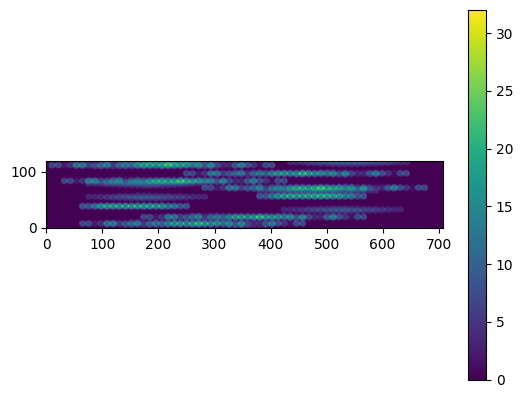

In [4]:
#gdal_print_metadata(tif_name=new_main_name_full)
plot_raster(tif_name=new_main_name_full)

In [5]:
run_polygonize(
    input_tif=new_main_name_full,
    mask='none',
    options=["-mask",new_main_name_full])

polygon_dict = shp_of_polygons_to_binned_dict(shp_file_name=new_main_name_full,bins=bm_dens_bins)

Creating output shapefiles/only_bm_seg-bm_dens--average-0.001-0.0005.shp.zip of format ESRI Shapefile.
Opened shapefile from shapefiles/only_bm_seg-bm_dens--average-0.001-0.0005.shp.zip. Shape: (15775, 2)
Converted shapefile to binned polygon dictionary


In [8]:
polygon_dict[1]

{3: <POLYGON ((8.967 56.975, 8.967 56.975, 8.967 56.975, 8.967 56.975, 8.967 56....>,
 5: <POLYGON ((8.968 56.975, 8.968 56.975, 8.968 56.975, 8.968 56.975, 8.968 56....>,
 9: <POLYGON ((8.969 56.975, 8.969 56.975, 8.969 56.975, 8.969 56.975, 8.969 56....>,
 11: <POLYGON ((8.97 56.975, 8.97 56.976, 8.97 56.976, 8.97 56.975, 8.97 56.975))>,
 13: <POLYGON ((8.97 56.975, 8.97 56.975, 8.971 56.975, 8.971 56.975, 8.97 56.975))>,
 16: <POLYGON ((8.972 56.975, 8.972 56.975, 8.972 56.975, 8.972 56.975, 8.972 56....>,
 38: <POLYGON ((8.982 56.975, 8.982 56.975, 8.982 56.975, 8.982 56.975, 8.982 56....>,
 43: <POLYGON ((8.983 56.975, 8.983 56.975, 8.984 56.975, 8.984 56.975, 8.983 56....>,
 45: <POLYGON ((8.984 56.975, 8.984 56.975, 8.984 56.975, 8.984 56.975, 8.984 56....>,
 49: <POLYGON ((8.985 56.975, 8.985 56.975, 8.985 56.975, 8.985 56.975, 8.985 56....>,
 51: <POLYGON ((8.986 56.975, 8.986 56.975, 8.986 56.975, 8.986 56.975, 8.986 56....>,
 55: <POLYGON ((8.987 56.975, 8.987 56.975, 8.987 